In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"D:\Github\Data-Science-And-Machine-Learning-Course\Datasets\placement.csv")

In [3]:
dataset.head(3)

,cgpa,score,package,placement
0,6.89,4.349952,3.26,1
1,5.12,6.609859,1.98,0
2,7.82,9.401520,3.25,1


In [4]:
X = dataset.drop(columns=["placement", "package"])
y = dataset["placement"]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# help(train_test_split)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt = DecisionTreeClassifier()

In [10]:
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [11]:
dt.score(X_test, y_test)

0.4090909090909091

In [12]:
dt.predict([[7.82,9.401520]])

D:\Installations\Miniconda\envs\dsml\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [13]:
from sklearn.tree import plot_tree

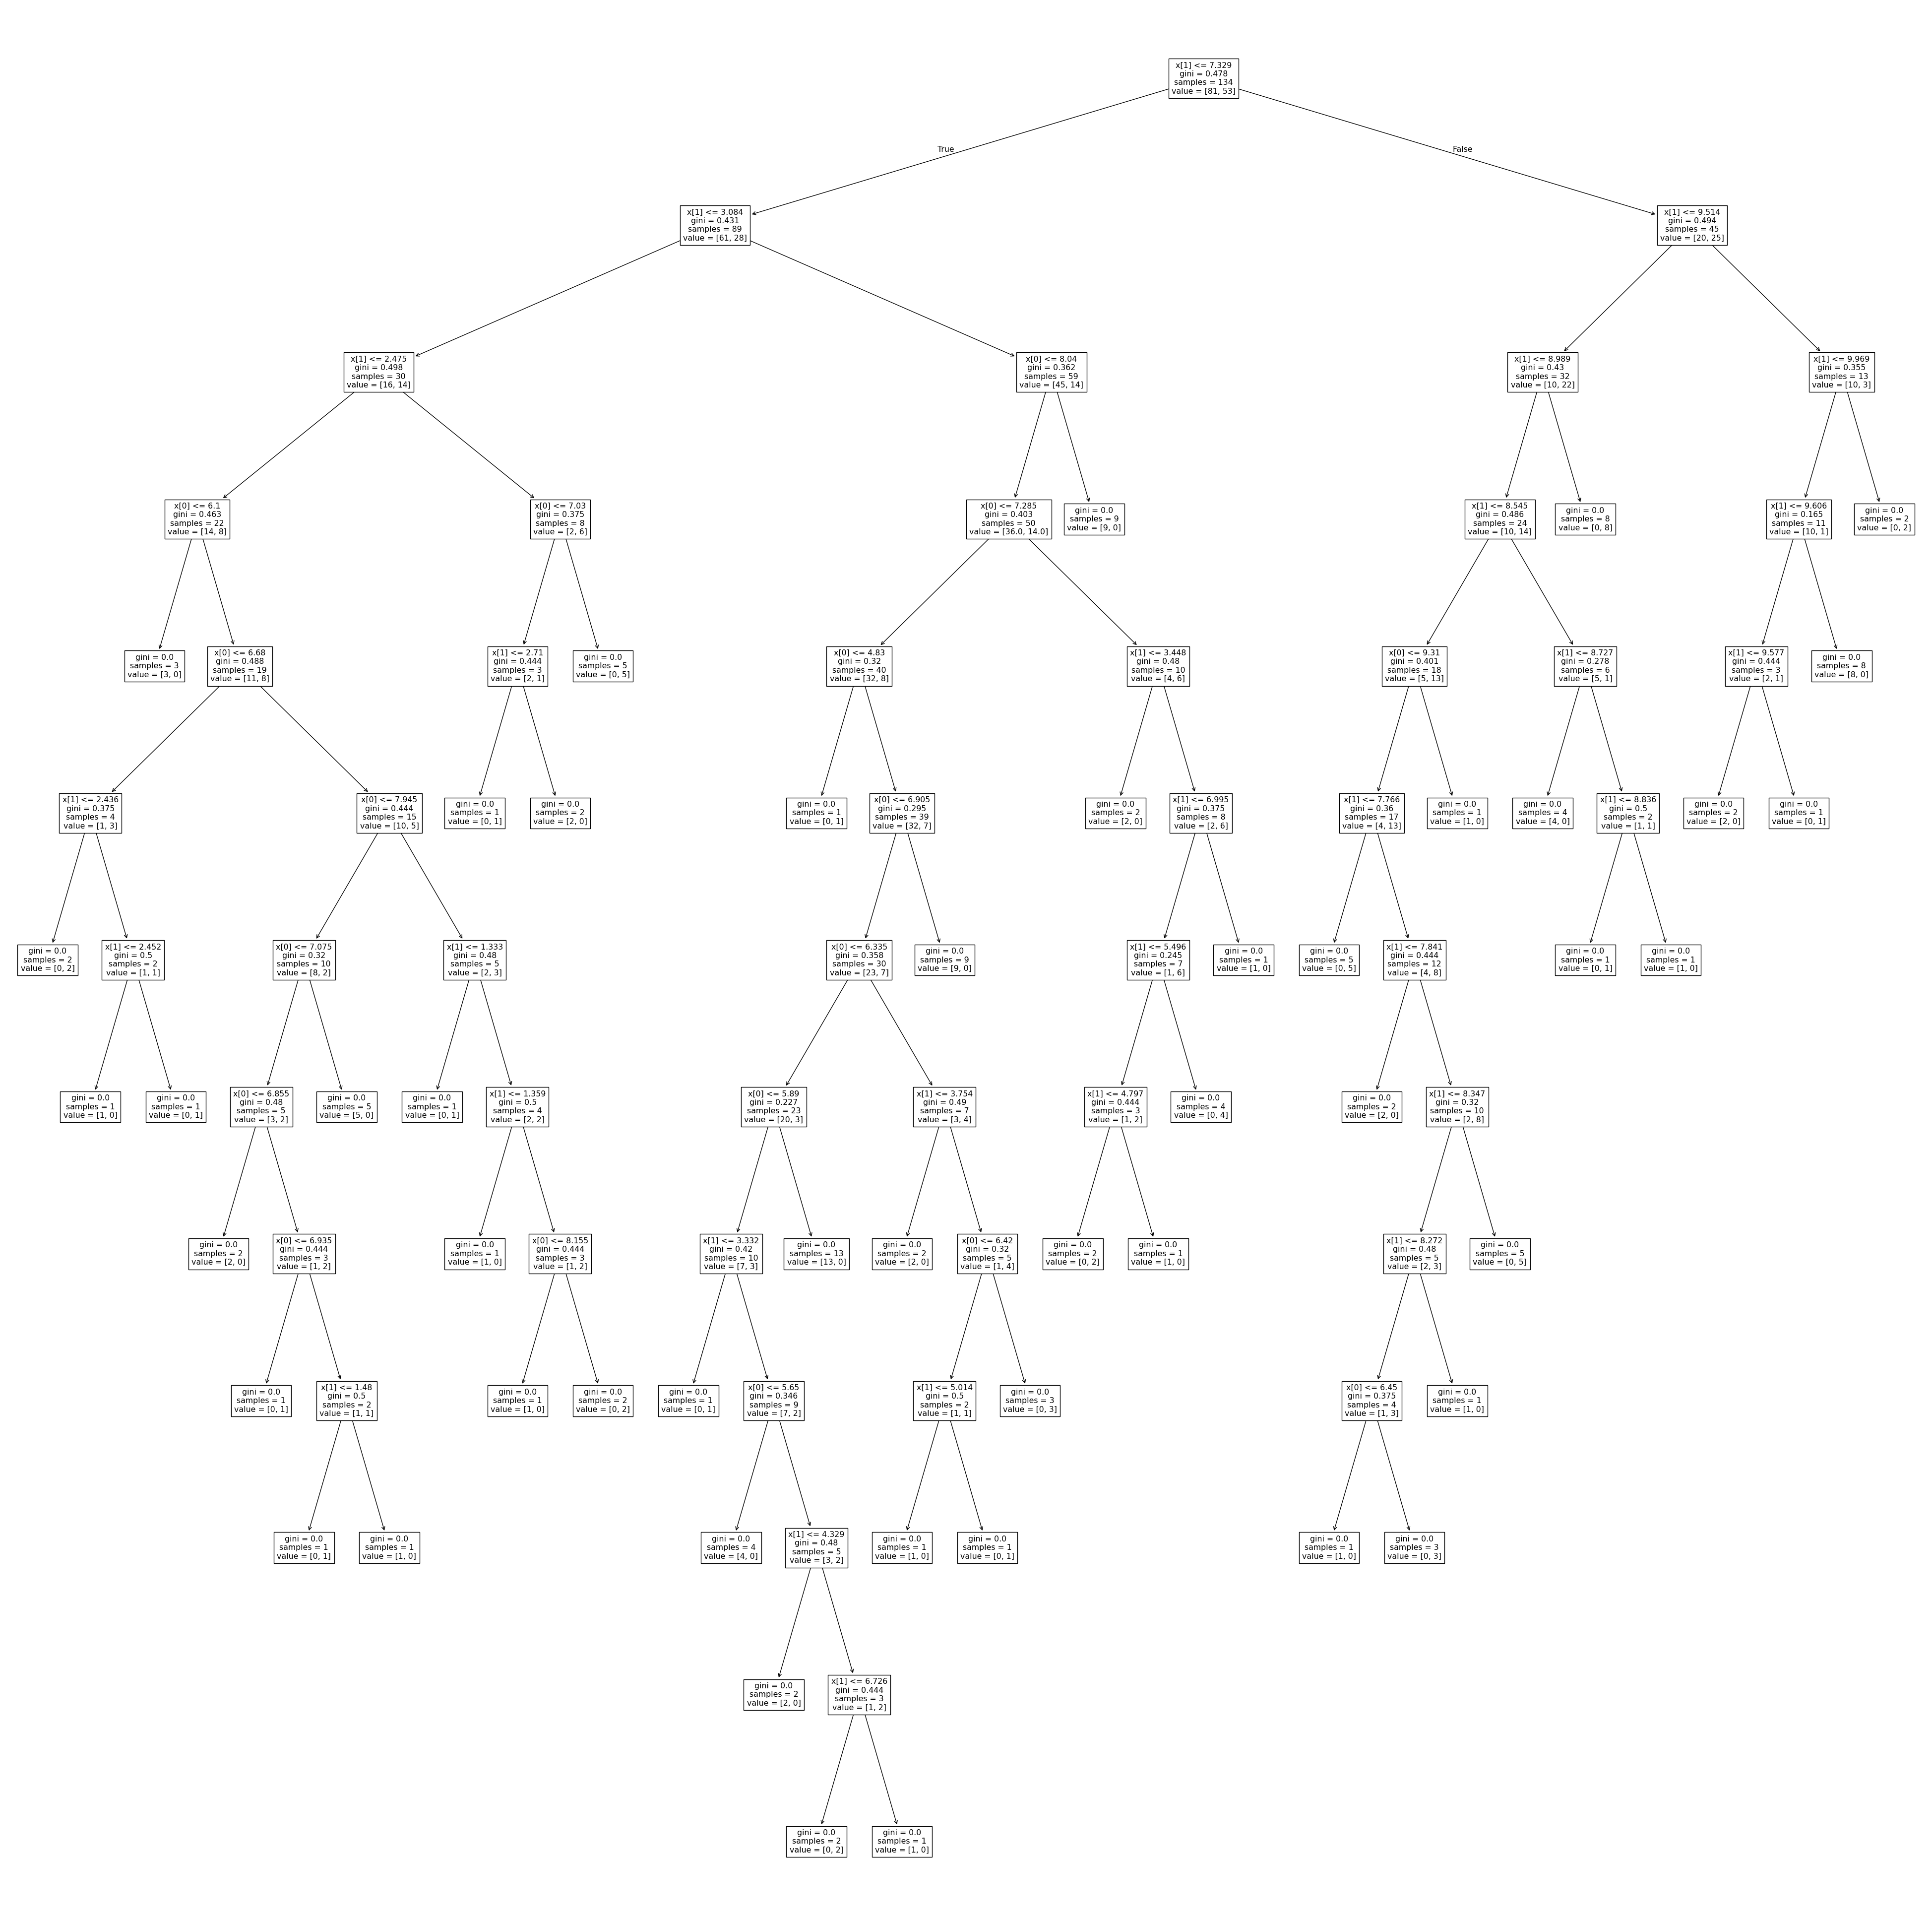

In [20]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.show()

### Criterion of decision tree

Criterion : {"gini", "entropy", "log_loss"}, default="gini"  
    The function to measure the quality of a split. Supported criteria are  
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the  
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

In [21]:
dt_entropy = DecisionTreeClassifier(criterion="entropy")
dt_entropy.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
dt_log_loss = DecisionTreeClassifier(criterion="log_loss")
dt_log_loss.fit(X_train, y_train)

,criterion,'log_loss'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [23]:
print("Criterion gini score     : ", dt.score(X_test, y_test))
print("Criterion entropy score  : ", dt_entropy.score(X_test, y_test))
print("Criterion log_loss score : ", dt_log_loss.score(X_test, y_test))

Criterion gini score     :  0.4090909090909091
Criterion entropy score  :  0.4696969696969697
Criterion log_loss score :  0.42424242424242425


In [24]:
from mlxtend.plotting import plot_decision_regions

D:\Installations\Miniconda\envs\dsml\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


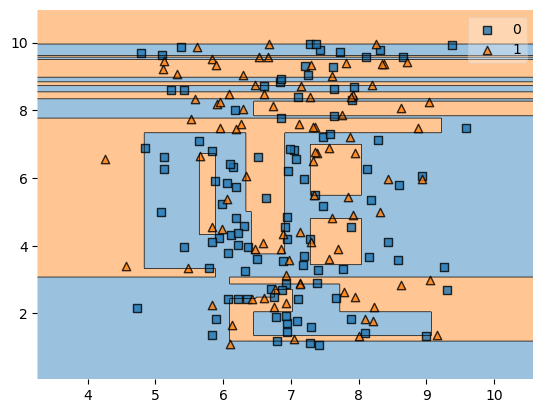

In [25]:
plot_decision_regions(X.to_numpy(), y.to_numpy(), clf=dt_log_loss)
plt.show()

In [28]:
#to check fest max_depth to find best accuracy
for i in range(1,20):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)
    print("Score with max_Depth ", i, " : ", dt.score(X_test, y_test), " , ", dt.score(X_train, y_train))

Score with max_Depth  1  :  0.5454545454545454  ,  0.6417910447761194
Score with max_Depth  2  :  0.5151515151515151  ,  0.6940298507462687
Score with max_Depth  3  :  0.48484848484848486  ,  0.7388059701492538
Score with max_Depth  4  :  0.5606060606060606  ,  0.7910447761194029
Score with max_Depth  5  :  0.5454545454545454  ,  0.8507462686567164
Score with max_Depth  6  :  0.5909090909090909  ,  0.8731343283582089
Score with max_Depth  7  :  0.5303030303030303  ,  0.9029850746268657
Score with max_Depth  8  :  0.5151515151515151  ,  0.9402985074626866
Score with max_Depth  9  :  0.4696969696969697  ,  0.9626865671641791
Score with max_Depth  10  :  0.48484848484848486  ,  0.9850746268656716
Score with max_Depth  11  :  0.4393939393939394  ,  0.9925373134328358
Score with max_Depth  12  :  0.4090909090909091  ,  1.0
Score with max_Depth  13  :  0.45454545454545453  ,  1.0
Score with max_Depth  14  :  0.45454545454545453  ,  1.0
Score with max_Depth  15  :  0.45454545454545453  ,  1.0

In [29]:
#choose the best one in which there is no overfitting and train_score almost equals to test score